# Retail Analysis with Walmart Data

**Procedures:**
* Background Introduction
* Dataset Description
* Objectives of Analysis
* Analysis Tasks to be performed

# Background Introduction

One of the leading retail stores in the world, Walmart, would like to predict the ***sales*** and ***demands*** accurately. 
The business is facing challenges due to unforeseen demands and runs out of stock some times, as the fact that there are certain events and holidays whihc impact sales to some extents. The current system fails to forecast the demand and sales appropriately. There is a need to develop an appropriate machine learning algorithm to predict demand accurately and ingest factors such as economic conditions including CPI, Unemployment Index, etc.



# Dataset Description

Historical sales date of Walmart 45 stores located in different regions are available for analysis and model building.
The historical data covers sales from 2010-02-05 to 2012-11-01 and includes the attributes as follows:

* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate




**Holiday Events:**
* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


*Note: Walmart runs several promotional events throughout the year. These events precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas.*

# Objectives of Analysis

* Leveraging the available data to perform extensive analysis mine the insights and patterns.
* Develop a machine learning algorithm to predict the future demand and sales.



#  Analysis Tasks to be Performed

* data wrangling 
* data exploration 
* data modeling 

**Basic Statistics tasks**
1. Which store has ***maximum*** sales
2. Which store has ***maximum standard deviation*** i.e., the sales vary a lot. Also, find out the ***coefficient of mean to standard deviation***
3. Which store/s has good quarterly growth rate in Q3’2012
4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights

**Statistical Model**
1. Build  prediction models to forecast demand

2. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

3. Select the model which gives best accuracy.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

In [3]:
df = pd.read_csv("Walmart_Store_sales.csv")

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


After checking the data field types, there are several data wrangling tasks needed to be conducted 
1. **Date** - transfer to **Datetime** type 
2. Split **Date** to YY-MM-DD fields seperately for the future time series annlysis 
3. Generate a attribute **Quarter** for the future analysis

In [6]:
# transfer to Datetime type 
df.Date = pd.to_datetime(df.Date)

In [7]:
#  Split **Date** to YY-MM-DD fields seperately for the future time series annlysis 
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [9]:
# Generate a attribute **Quarter** for the future analysis
df["Quarter"] = 0
Quarter_one = df[df["Month"]<4]
Quarter_two = df[(df["Month"]>=4)& (df["Month"]<7)]
Quarter_three = df[(df["Month"]>=7)& (df["Month"]<10)]
Quarter_four = df[(df["Month"]>=10)& (df["Month"]<=12)]
print (df.shape)
print (Quarter_one.shape[0]+Quarter_two.shape[0]+Quarter_three.shape[0]+Quarter_four.shape[0])
Quarter_one.loc[:,'Quarter'] = 1 
Quarter_two.loc[:,'Quarter'] = 2 
Quarter_three.loc[:,'Quarter'] = 3
Quarter_four.loc[:,'Quarter'] = 4
df1 = pd.concat([Quarter_one,Quarter_two,Quarter_three,Quarter_four],axis=0).reset_index().drop(columns='index')

(6435, 12)
6435


/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
0,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,1
1,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,1
2,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,19,3,2010,1
3,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,26,3,2010,1
4,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,4,2,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-11-05,770487.37,0,61.24,3.889,190.976417,8.567,5,11,2012,4
6431,45,2012-10-08,733037.32,0,78.65,3.722,191.162613,8.684,8,10,2012,4
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,4


# Data Exploration 

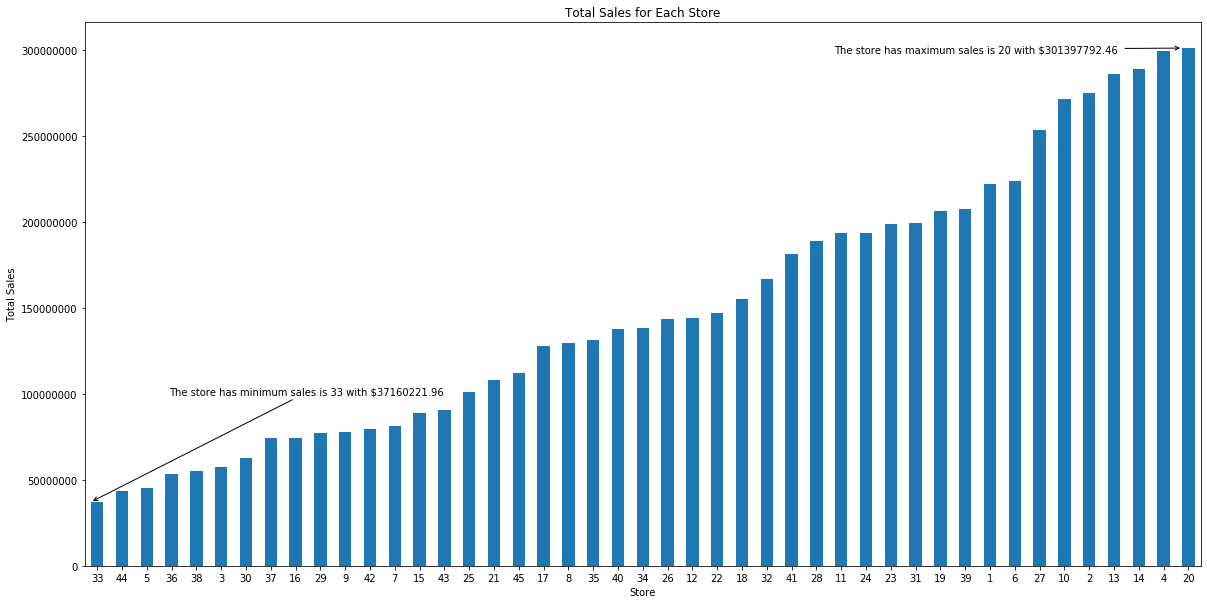

In [11]:
# To determine which store has maximum sales, the dataset will be grouped by store and sum the weekly sales together for each store
fig, ax = plt.subplots(figsize=(20,10))
ax = df1.groupby("Store")["Weekly_Sales"].sum().sort_values().plot(kind='bar')
bar = ax.patches[0] # the store has the lowest sale 
ax.annotate("The store has minimum sales is 33 with ${0:.2f} ".format((bar.get_height())),
            xy=(bar.get_x(), bar.get_height()), xycoords='data',
            xytext=(0.2, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

bar = ax.patches[-1] # the store has the lowest sale 
ax.annotate("The store has maximum sales is 20 with ${0:.2f} ".format((bar.get_height())),
            xy=(bar.get_x(), bar.get_height()), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

plt.xticks(rotation=0)
# no sentific reading format for y-axis
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Sales for Each Store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

**Insight One:** **As can be seen from the above plot, store 20 has the maximum sales among all stores which is almost 10 times higher then the store 33 which has the minimum sales.**

In [12]:
# To find out which store has maximum standard deviation, date is needed to be grouped by store and std aggregation function will be used.
# Also, find out the coefficient of mean to standard deviation


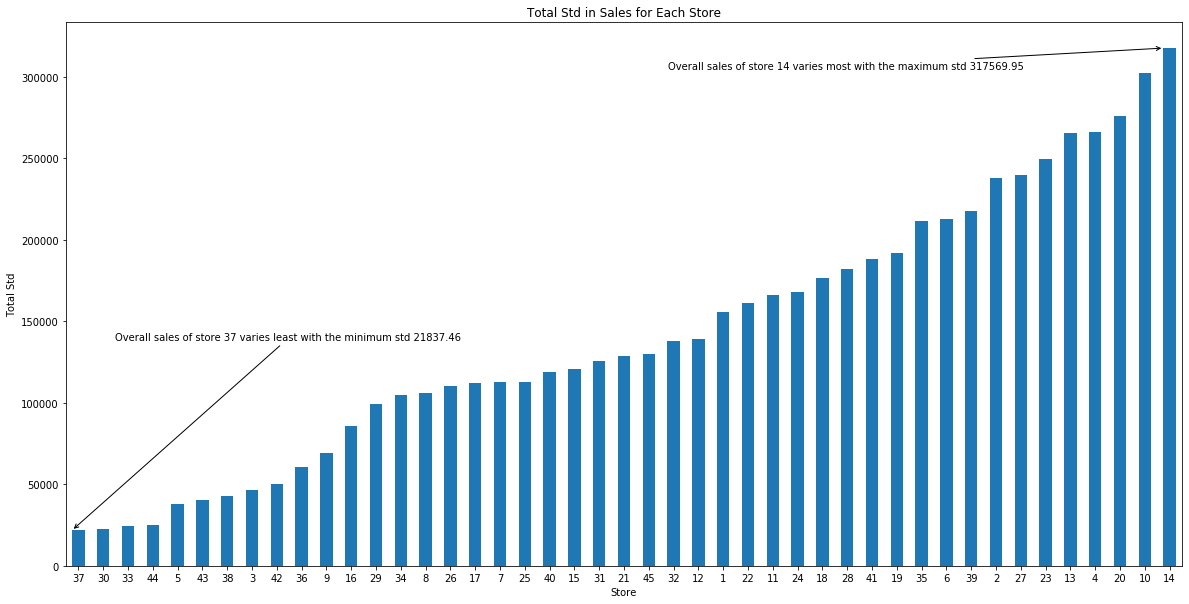

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax = df1.groupby("Store")["Weekly_Sales"].std().sort_values().plot(kind="bar")
bar = ax.patches[0]
ax.annotate("Overall sales of store 37 varies least with the minimum std {0:.2f} ".format((bar.get_height())),
            xy=(bar.get_x(), bar.get_height()), xycoords='data',
            xytext=(0.2, 0.42), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

bar = ax.patches[-1]
ax.annotate("Overall sales of store 14 varies most with the maximum std {0:.2f} ".format((bar.get_height())),
            xy=(bar.get_x(), bar.get_height()), xycoords='data',
            xytext=(0.7, 0.92), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

plt.xticks(rotation=0)
# no sentific reading format for y-axis
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Std in Sales for Each Store')
plt.xlabel('Store')
plt.ylabel('Total Std');

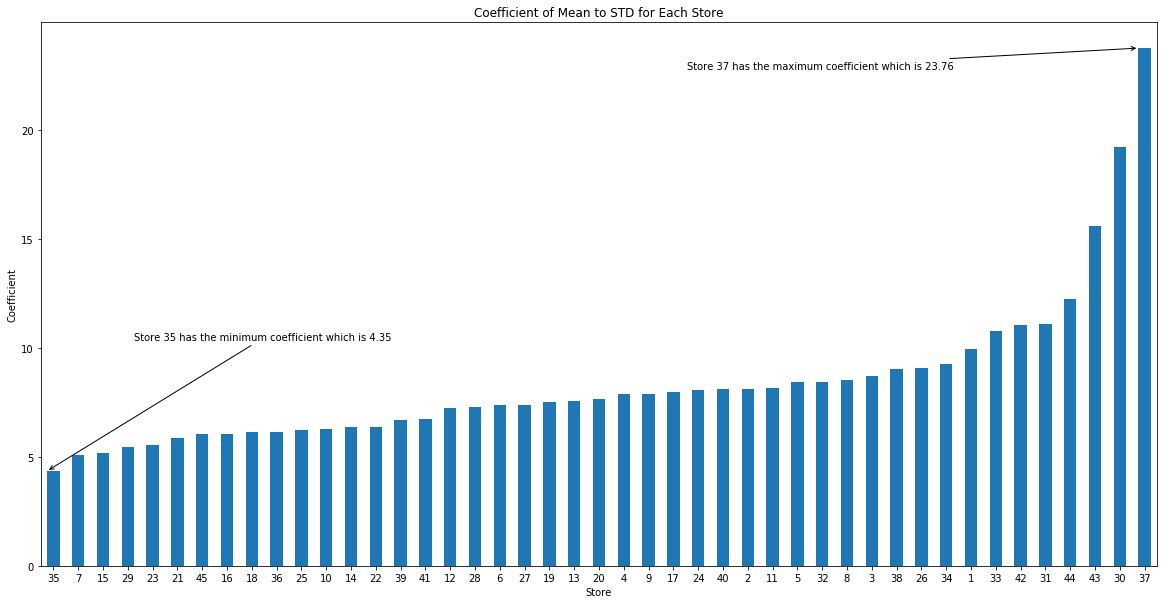

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

ax = ((df1.groupby("Store")["Weekly_Sales"].mean())/(df1.groupby("Store")["Weekly_Sales"].std())).sort_values().plot(kind='bar')
bar = ax.patches[0]
ax.annotate("Store 35 has the minimum coefficient which is {0:.2f} ".format((bar.get_height())),
            xy=(bar.get_x(), bar.get_height()), xycoords='data',
            xytext=(0.2, 0.42), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

bar = ax.patches[-1]
ax.annotate("Store 37 has the maximum coefficient which is {0:.2f} ".format((bar.get_height())),
            xy=(bar.get_x(), bar.get_height()), xycoords='data',
            xytext=(0.7, 0.92), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

plt.xticks(rotation=0)
# no sentific reading format for y-axis
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Coefficient of Mean to STD for Each Store')
plt.xlabel('Store')
plt.ylabel('Coefficient');

In [15]:
# To find out which store/s has good quarterly growth rate in Q3’2012, we need to compare each store sales in Q2'2012 and Q3'2012

Text(0.4, 0.98, 'Store 16 has the best quarterly growth rate in Q3’2012 ')

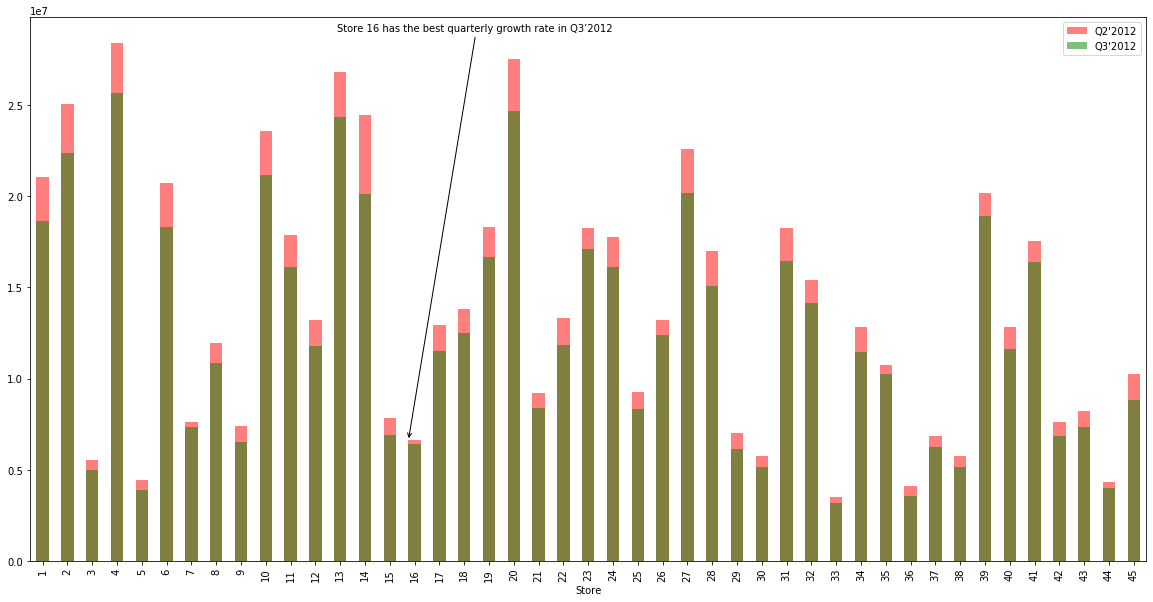

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax = df1[(df1['Year']==2012)&(df1['Quarter']==3)].groupby('Store')['Weekly_Sales'].sum().plot(
    ax = df1[(df1['Year']==2012)&(df1['Quarter']==2)].groupby('Store')['Weekly_Sales'].sum().plot(kind="bar",color='r',alpha=0.5,label = "Q2'2012"),
    kind="bar",
    color = "g",
    alpha=0.5,
    legend=True,
    label="Q3'2012")
ax.legend();

bar = ax.patches[15]
ax.annotate("Store 16 has the best quarterly growth rate in Q3’2012 ",
            xy=(bar.get_x(), bar.get_height()), xycoords='data',
            xytext=(0.4, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

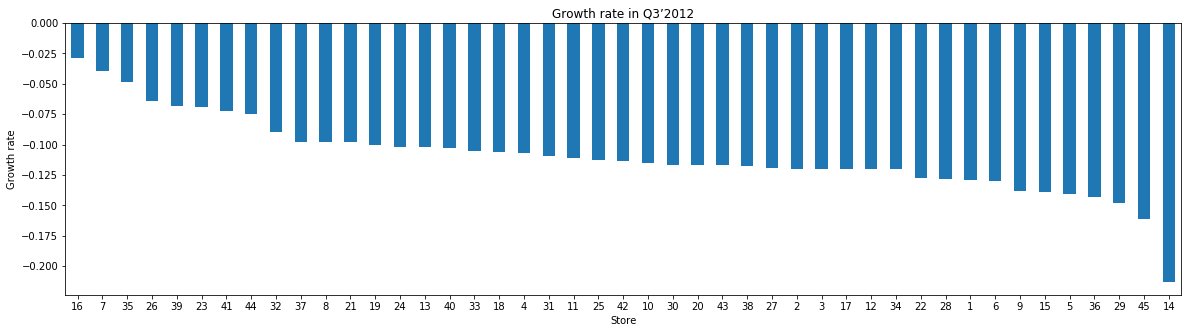

In [17]:
Q3 = df1[(df1['Year']==2012)&(df1['Quarter']==3)].groupby('Store')['Weekly_Sales'].sum()   # 6441311.11
Q2 = df1[(df1['Year']==2012)&(df1['Quarter']==2)].groupby('Store')['Weekly_Sales'].sum()   # 6626133.44
grow_rate = (Q3-Q2)/Q3

fig, ax = plt.subplots(figsize=(20,5))
ax = grow_rate.sort_values(ascending=False).plot(kind='bar')

plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Growth rate in Q3’2012')
plt.xlabel('Store')
plt.ylabel('Growth rate');

**Insight Two: from the plot above, we can see all the store had experieced the decline in sale at Q3'2012 to some extenteds. Store 16 had the highest negative growth rate and store 14 had the lowest negative growth rate comparing with the privious quarter Q2'2012.**

In [18]:
# Some holidays have a negative impact on sales.
# To find out holidays which have higher sales than the mean sales in non-holiday season for all stores together,
# we need to plot aggregate the weekly sales for all the stores and diaplay it in time series line chart.
# Then the week of holiday is needed to be highlighted to visually check if the holiday has negative impact on sales or not.

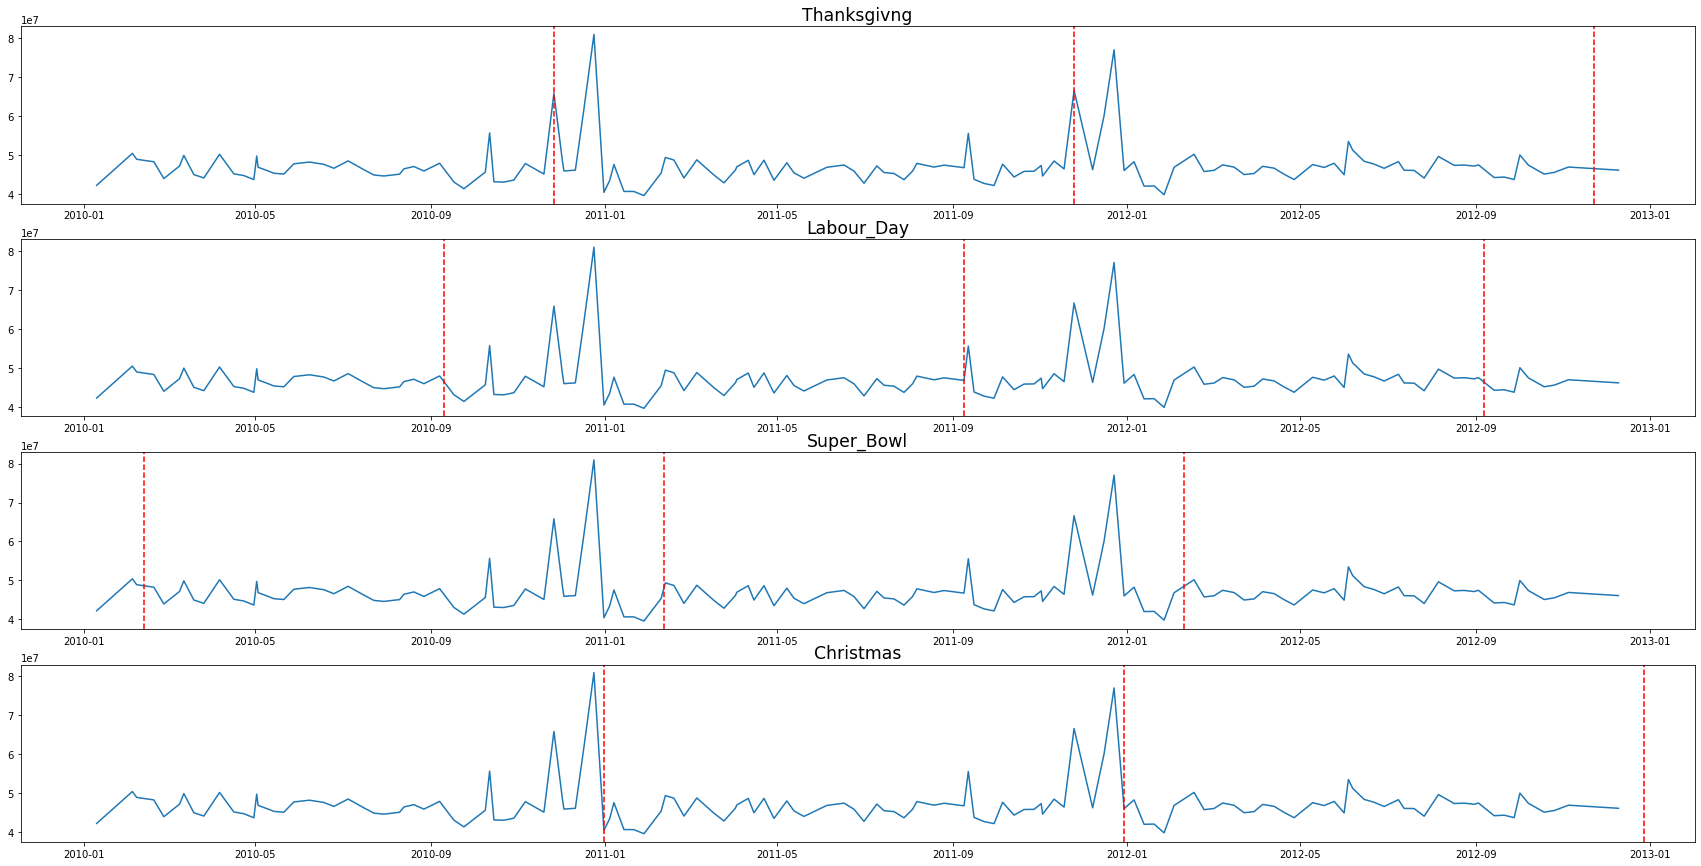

In [19]:
from datetime import datetime

def show_holidays(ax, events, col,title):
    for i in events:
        day = datetime.strptime(i, '%d-%m-%Y')
        ax.axvline(x=day, linestyle='--', c=col)
    ax.set_title(title, fontsize="xx-large")


Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

fig, ax = plt.subplots(4,figsize=(30,15))
ax[0].plot(df1.groupby('Date')['Weekly_Sales'].sum())
ax[1].plot(df1.groupby('Date')['Weekly_Sales'].sum())
ax[2].plot(df1.groupby('Date')['Weekly_Sales'].sum())
ax[3].plot(df1.groupby('Date')['Weekly_Sales'].sum())

show_holidays(ax[0],Thanksgiving,'r','Thanksgivng')
show_holidays(ax[1],Labour_Day,'r','Labour_Day')
show_holidays(ax[2],Super_Bowl,'r','Super_Bowl')
show_holidays(ax[3],Christmas,'r','Christmas')



**Insight Three: Thanksgiving has positive impact on sales as we can seen from the graph that the weekly sales during the Thanksgiving weeks are higher the other weeks. 
Unlike Thanksgiving, Christmas seems cause a negative impact on sales. Super Bowl and Labour Day have relatively neutral impacts on sales since there are no apprent ups and downs.**

In [20]:
# Provide a monthly and semester view of sales in units and give insights

In [21]:
kk = df1.groupby(["Store"])

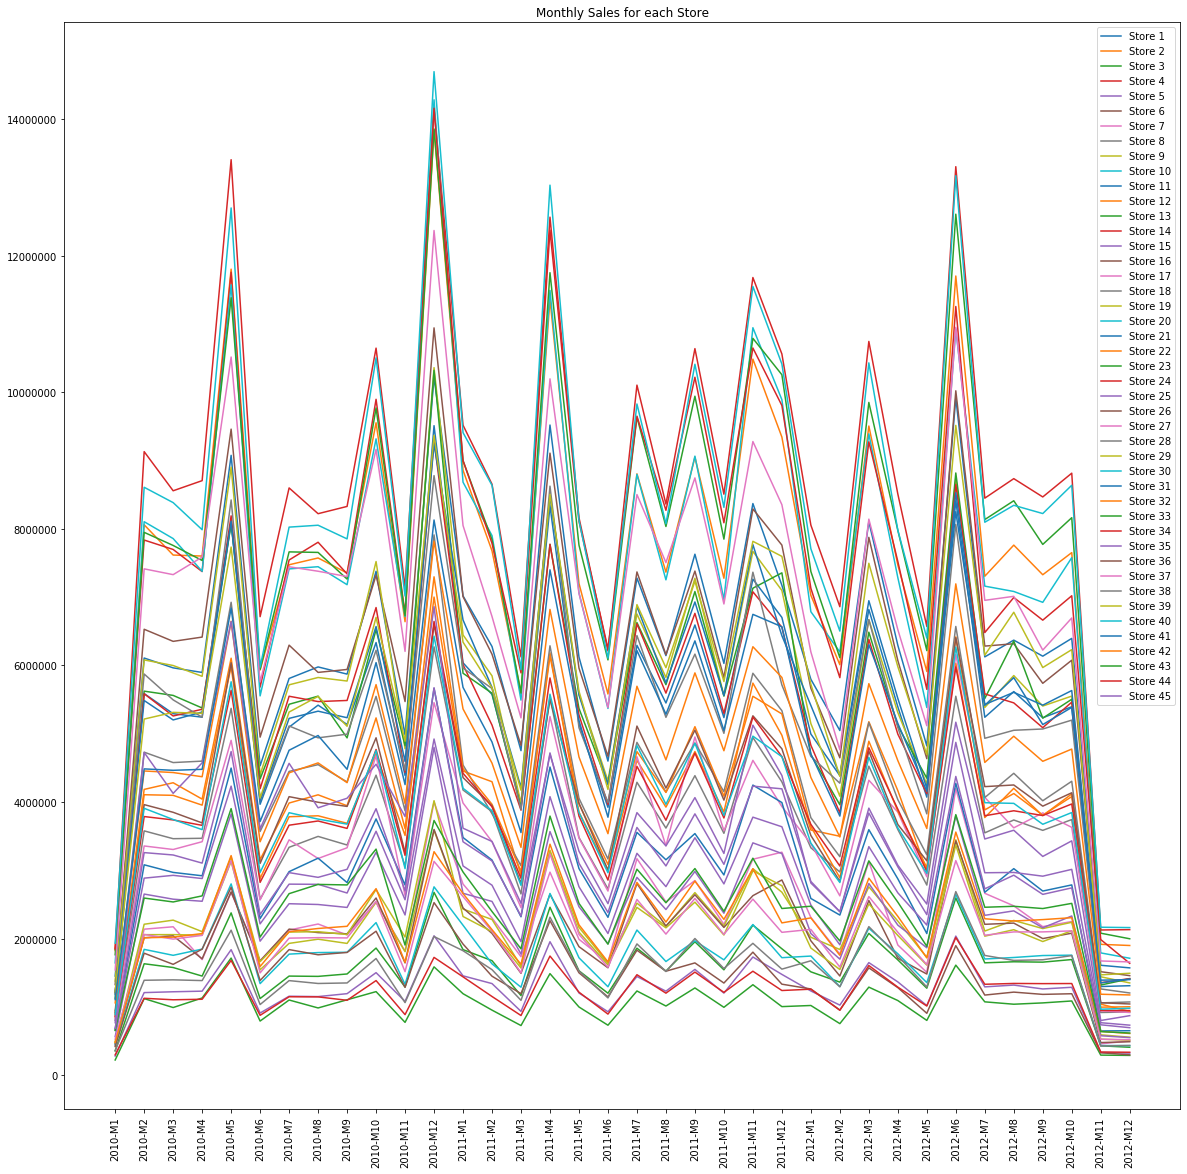

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
import matplotlib.dates as mdates

for i in range(1,46):
    temp = kk.get_group(i).groupby(['Year','Month'])['Weekly_Sales'].sum().reset_index()
    ax.plot(temp['Year'].map(str)+ '-M' +temp['Month'].map(str),temp['Weekly_Sales'],label="Store "+str(i))
ax.legend()
ax.set_title("Monthly Sales for each Store")
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

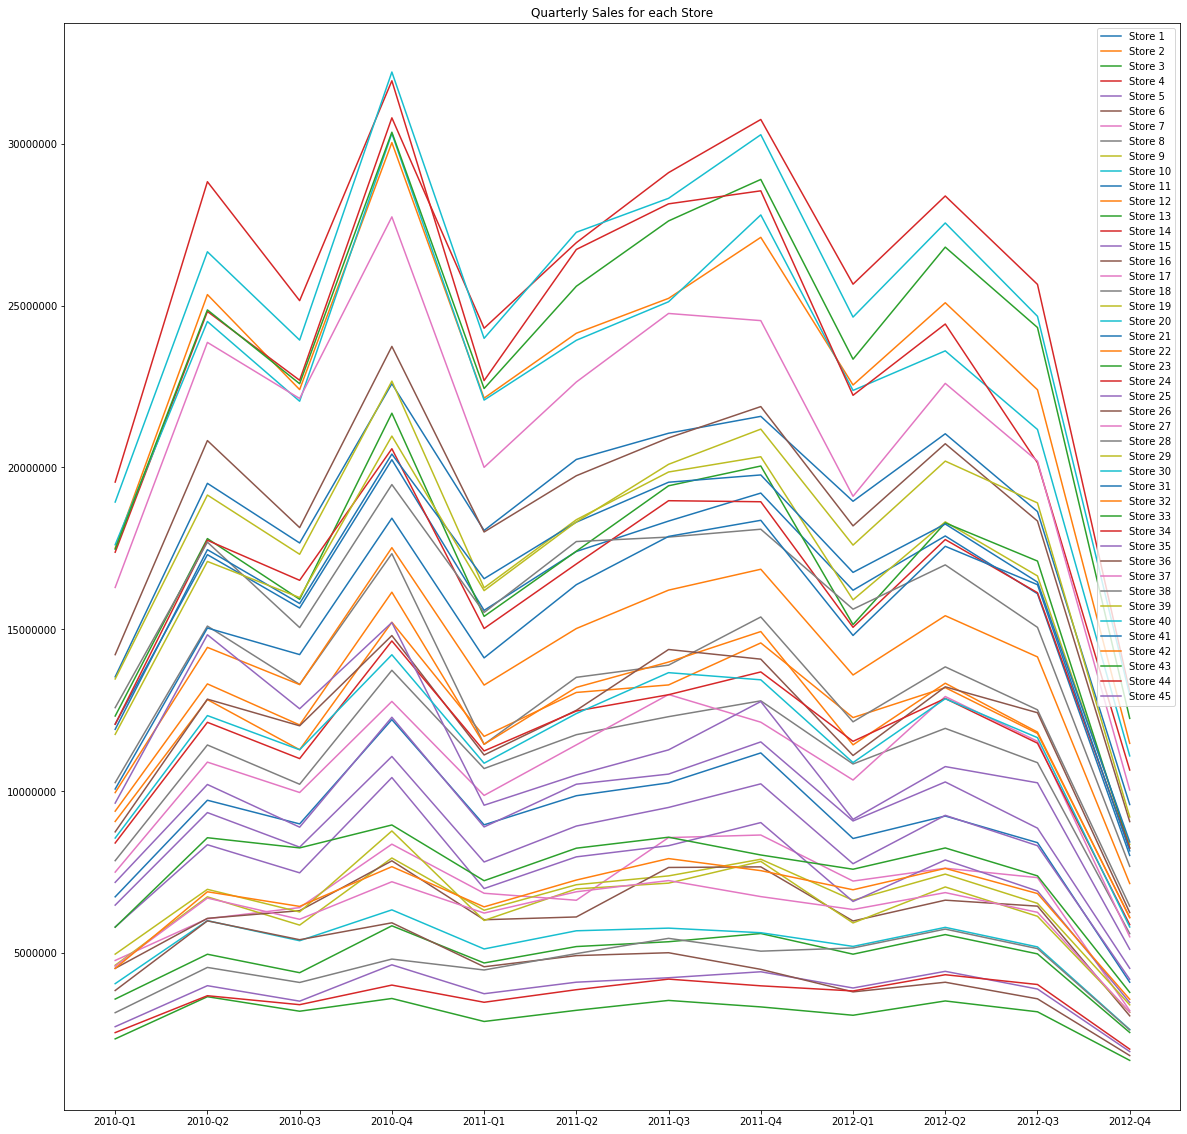

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
import matplotlib.dates as mdates
for i in range(1,46):
    temp = kk.get_group(i).groupby(['Year','Quarter'])['Weekly_Sales'].sum().reset_index()
    ax.plot(temp['Year'].map(str)+ '-Q' +temp['Quarter'].map(str),temp['Weekly_Sales'],label="Store "+str(i))
ax.legend()
ax.set_title("Quarterly Sales for each Store")
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

Text(0.5, 1.0, 'Average Quarterly Sales for all Stores')

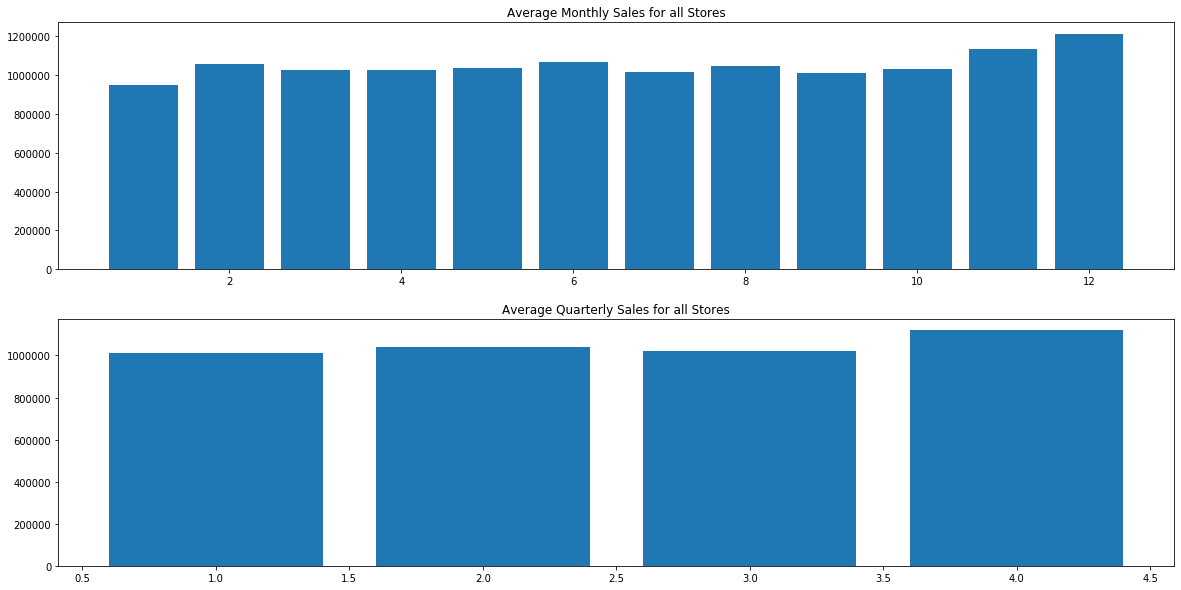

In [24]:
fig, ax = plt.subplots(2,figsize=(20,10))
month = df1.groupby('Month')['Weekly_Sales'].mean().reset_index()
ax[0].bar(month['Month'],month['Weekly_Sales'])
quarter = df1.groupby('Quarter')['Weekly_Sales'].mean().reset_index()
ax[1].bar(quarter['Quarter'],quarter['Weekly_Sales'])
ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')
ax[1].ticklabel_format(useOffset=False, style='plain', axis='y')
ax[0].set_title("Average Monthly Sales for all Stores")
ax[1].set_title("Average Quarterly Sales for all Stores")

* **Insight Four: as can be seen from the plots of Monthly and Quarterly sales of each store, each store has different sales but they all have similar fluctuation trends.**
* **Insight Five: as can be seen from the plots of Monthly and Quarterly sales of all sotres, Quater 4 tends to have the higher sales especially in Decemeber. Quarter 1 hs the lowest sales especially in January.**

# Data Modeling
* Build prediction models to forecast demand
* Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
* Select the model which gives best accuracy.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
Store           6435 non-null int64
Date            6435 non-null datetime64[ns]
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
Day             6435 non-null int64
Month           6435 non-null int64
Year            6435 non-null int64
Quarter         6435 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


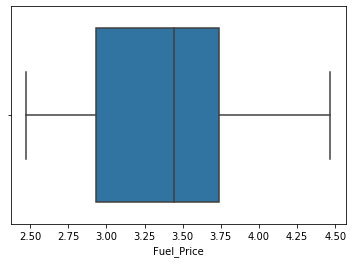

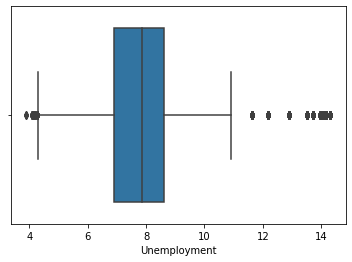

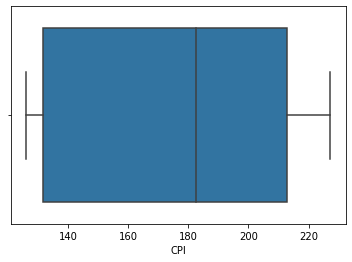

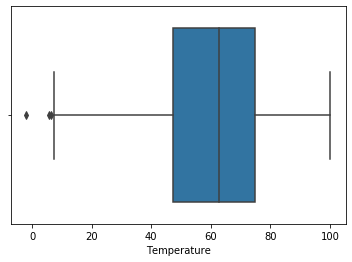

In [26]:
# To build a linear regression model, first determine/remove outliers and then do the select the features.
fig, axs = plt.subplots()
sns.boxplot(df1['Fuel_Price'])
fig, axs = plt.subplots()
sns.boxplot(df1['Unemployment'])
fig, axs = plt.subplots()
sns.boxplot(df1['CPI'])
fig, axs = plt.subplots()
sns.boxplot(df1['Temperature'])

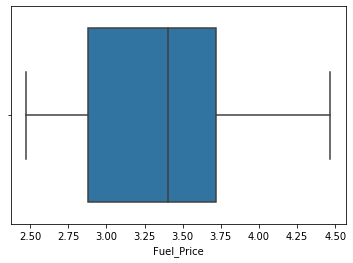

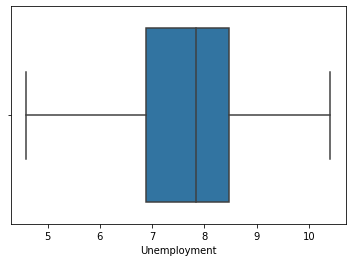

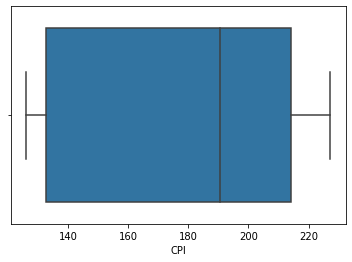

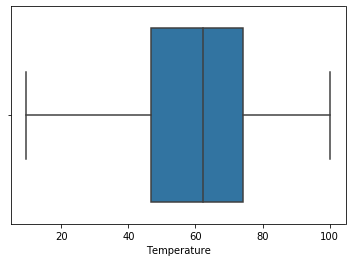

In [27]:
# Remove the outliers detected from Temperature and Unemployment
df2 = df1[(df1['Unemployment']<10.5) & (df1['Unemployment']>4.5) & (df1['Temperature']>8)]
fig, axs = plt.subplots()
sns.boxplot(df2['Fuel_Price'])
fig, axs = plt.subplots()
sns.boxplot(df2['Unemployment'])
fig, axs = plt.subplots()
sns.boxplot(df2['CPI'])
fig, axs = plt.subplots()
sns.boxplot(df2['Temperature'])

In [ ]:
!conda install numpy==1.17.4

corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for numpydoc prompt_toolkit conda plotly jupyterlab_server a/ 

**Insight Six:**
* Fuel_Price and Year are positively correlated.
* Weekly_Sales and Store are negatively correalted.
* Holiday_Flag and Month are positvely correlated.
* Unemployment and CPI are negatively correlated.

Selected Feature: Store, Fuel_Price, CPI, Unemployment, Holiday_Flag, Temperature, Month, Year
Response Variable: Weekly_Sales

In [35]:
df3 = pd.DataFrame()
df3['Store'] = df2['Store']
df3['Fuel_Price'] = df2['Fuel_Price']
df3['Unemployment'] = df2['Unemployment']
df3['CPI'] = df2['CPI']
df3['Temperature'] = df2['Temperature']
df3['Holiday_Flag'] = df2['Holiday_Flag'].astype("category")
df3['Month'] = df2['Month'].astype("category")
df3['Year'] = df2['Year'].astype("category").cat.codes
df3['Weekly_Sales'] = df2['Weekly_Sales']


Linear Regressor:

Accuracy: 13.313032512429713
Mean Absolute Error: 439043.0861090892
Mean Squared Error: 283720586599.8878
Root Mean Squared Error: 532654.2843157162


/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please c

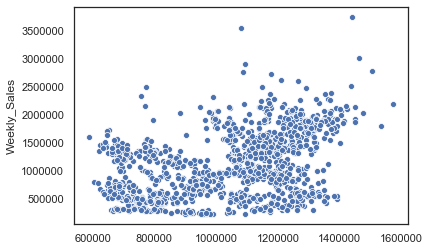

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


X = df3[['Store','Fuel_Price','CPI','Unemployment','Holiday_Flag','Temperature','Month']]
y = df3['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print ("Linear Regressor:")
print()

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test);
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.ticklabel_format(useOffset=False, style='plain', axis='x')

Random Forest Regressor:

Accuracy: 99.12418438489068
Accuracy: 91.72435257108687
Mean Absolute Error: 84858.16973350562
Mean Squared Error: 26472606940.28172
Root Mean Squared Error: 162704.04709251


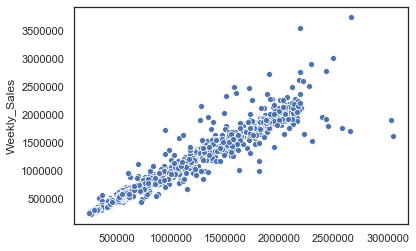

In [37]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)


print('Accuracy:',rfr.score(X_train, y_train)*100)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test);
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.ticklabel_format(useOffset=False, style='plain', axis='x')

In [38]:
# Arima time series model building 
# let choose one store first 
# check the stationarity
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# import statsmodels.formula.api as smf
# import statsmodels.tsa.api as smt

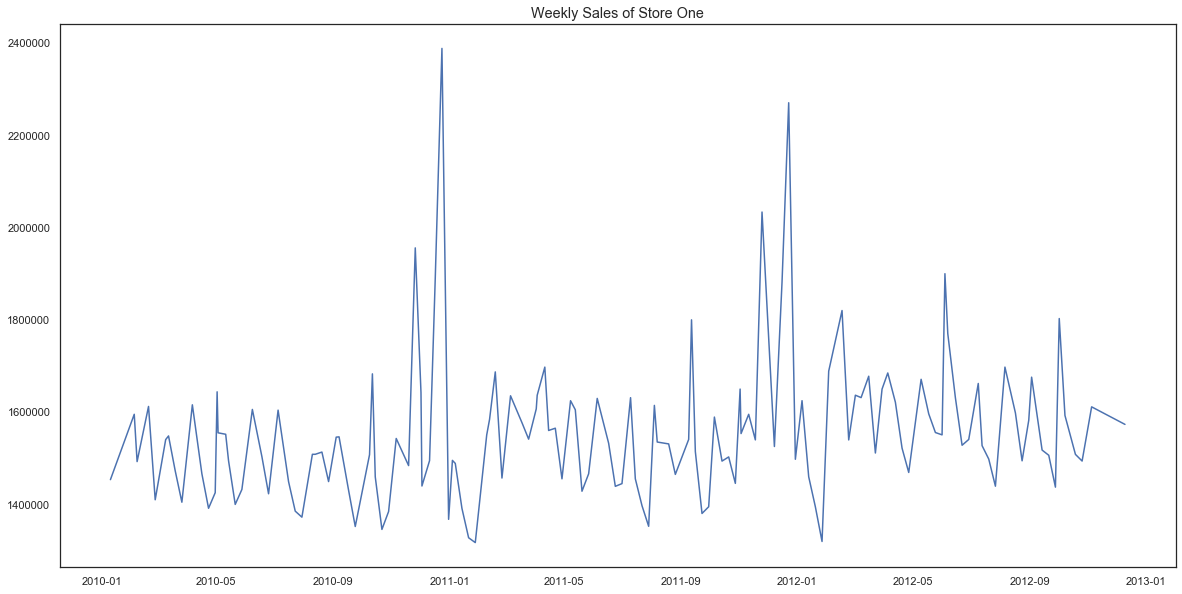

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
store_one = df1[df1['Store']==1][['Date','Weekly_Sales']].sort_values(by="Date",).set_index('Date')
ax.plot(store_one['Weekly_Sales'])
ax.set_title("Weekly Sales of Store One", fontsize="large")
plt.ticklabel_format(style='plain',axis='y')


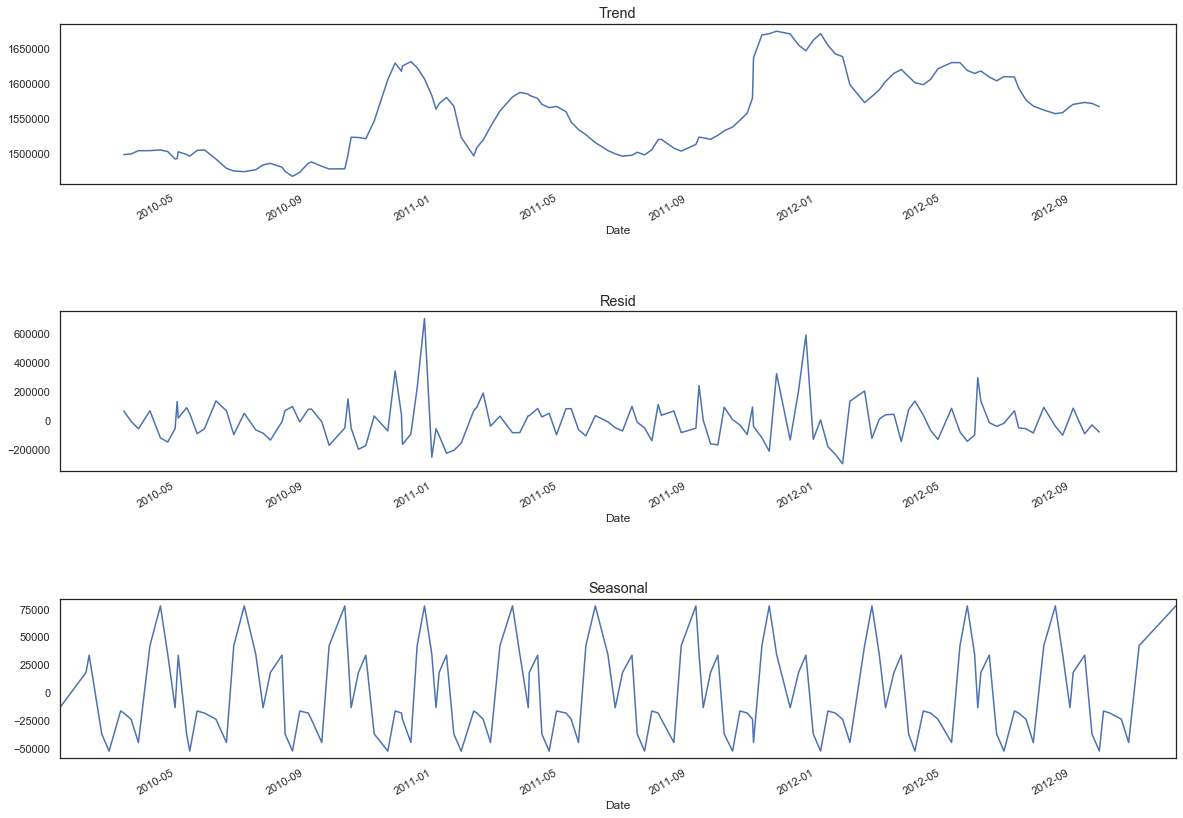

In [40]:
result = seasonal_decompose(store_one, model='additive', period=12)
fig, ax = plt.subplots(3,figsize=(20,15))
result.trend.plot(ax=ax[0])
result.resid.plot(ax=ax[1])
result.seasonal.plot(ax=ax[2])
fig.subplots_adjust(hspace = 0.8)
ax[0].set_title("Trend", fontsize="large")
ax[1].set_title("Resid",fontsize="large")
ax[2].set_title("Seasonal",fontsize="large")
ax[0].ticklabel_format(style="plain",axis="y")

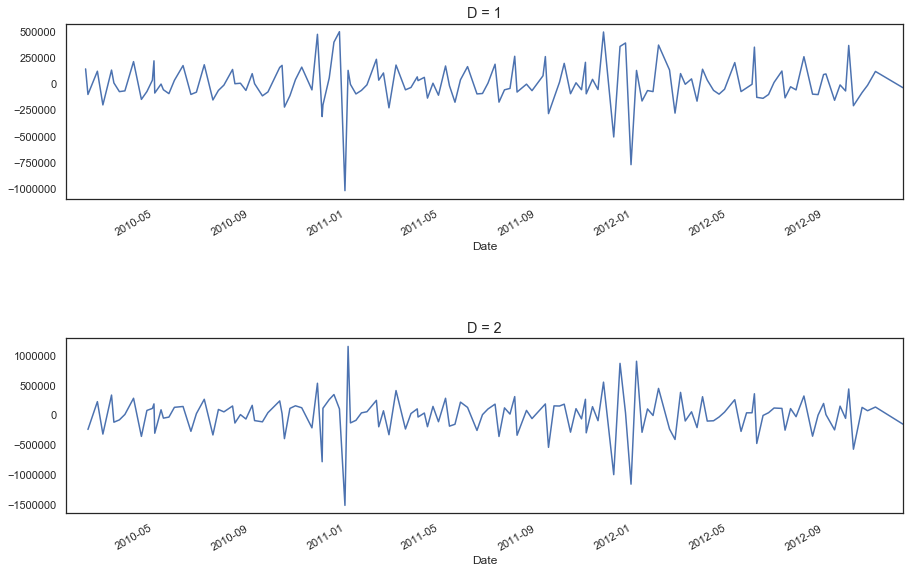

In [41]:
# differecing 
fig, ax = plt.subplots(2)

store_one['Weekly_Sales'].diff(1).plot(ax= ax[0],figsize=(15,10))
store_one['Weekly_Sales'].diff(1).diff(1).plot(ax= ax[1],figsize=(15,10))
ax[0].set_title("D = 1",fontsize="large")
ax[1].set_title("D = 2",fontsize="large")
ax[0].ticklabel_format(style='plain',axis='y')
ax[1].ticklabel_format(style='plain',axis='y')

fig.subplots_adjust(hspace = 0.8)

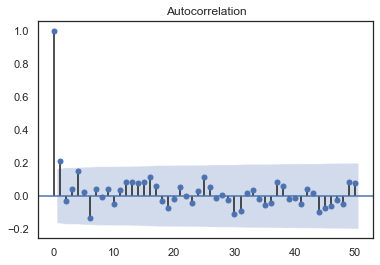

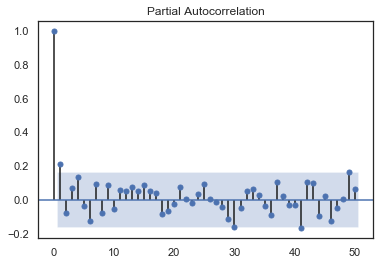

In [42]:
ax1 = sm.graphics.tsa.plot_acf(store_one['Weekly_Sales'],lags=50)
ax2 = sm.graphics.tsa.plot_pacf(store_one['Weekly_Sales'],lags=50)

In [44]:
from pmdarima.arima import auto_arima

In [45]:
stepwise_model = auto_arima(store_one, start_p=1, d=2, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=3574.870, Time=0.29 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=3735.034, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=3664.268, Time=0.07 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=3579.869, Time=0.12 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=3575.423, Time=0.34 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=3575.487, Time=0.53 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=3577.423, Time=1.18 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=3648.599, Time=0.09 sec
 ARIMA(2,2,1)(0,1,1)[12]             : AIC=3569.537, Time=0.21 sec
 ARIMA(2,2,1)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(2,2,1)(1,1,1)[12]             : AIC=3570.472, Time=0.33 sec
 ARIMA(2,2,1)(0,1,2)[12]             : AIC=3570.555, Time=0.48 sec
 ARIMA(2,2,1)(1,1,0)[12]          

In [46]:
train = store_one.loc[:'2012-05-01']
test = store_one.loc['2012-05-01':]
stepwise_model.fit(train)

ARIMA(order=(4, 2, 4), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [47]:
future_forecast = stepwise_model.predict(n_periods=len(test))

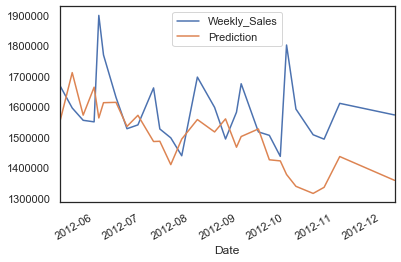

In [48]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

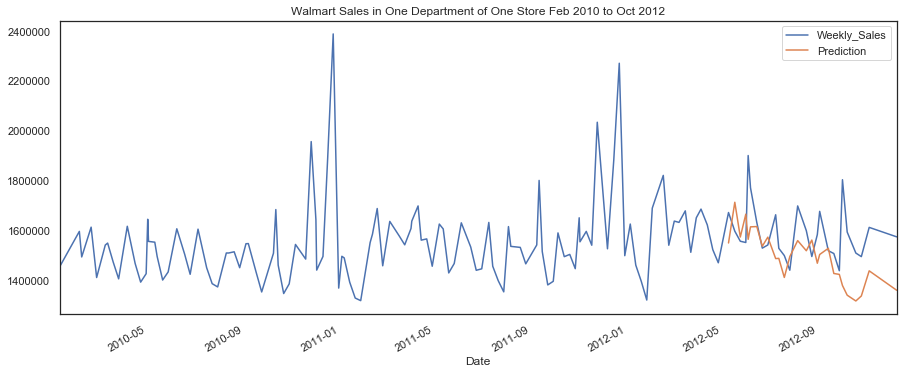

In [49]:
pd.concat([store_one,future_forecast],axis=1).plot(figsize=(15, 6),
                                             title="Walmart Sales in One Department of One Store Feb 2010 to Oct 2012")

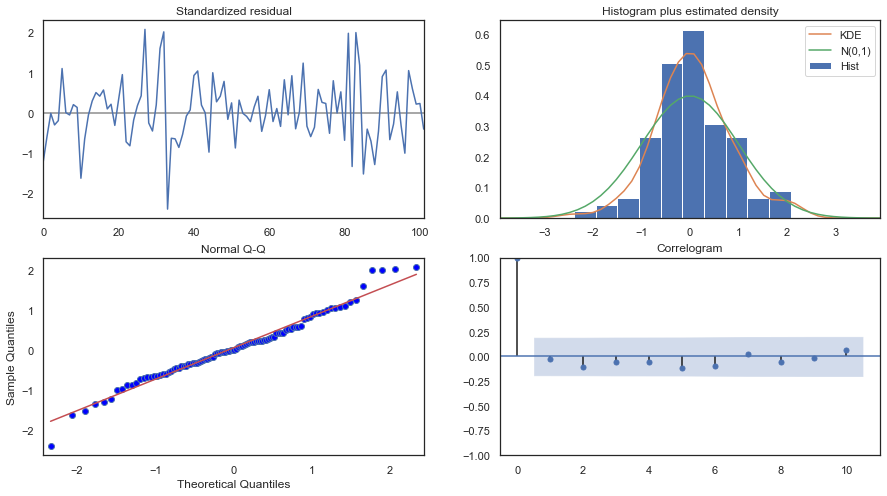

In [50]:
result = stepwise_model.plot_diagnostics(figsize=(15,8))